# Outline
- Download the dataset(CIFAR-10)
- Dataloader in torch.utils.data
- Visualizing images
- Single and multiple convolutional layers
- LeNet
- Training Lenet
- Training on GPU
- Simple Visualization
- Exercises

In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Data Loading

In [4]:
import torchvision
from torchvision.transforms import transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
  download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
  shuffle=True)

100%|██████████| 170498071/170498071 [00:03<00:00, 53422168.58it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [5]:
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [6]:
for images, labels in trainloader:
    print(images.shape)
    print(images[0].shape)
    print(labels[0].item())
    break  # Exit the loop after printing the first batch



torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
1


# Visualizing data

In [7]:
img = images[1]
print(type(img))


<class 'torch.Tensor'>


In [8]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


(32, 32, 3)


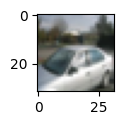

In [9]:
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)
plt.figure(figsize = (1,1))
plt.imshow(npimg)
plt.show()

In [10]:
def imshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

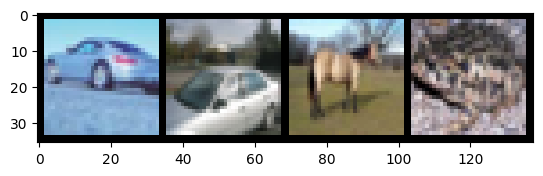

car car horse frog


In [11]:
imshow (torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

# Single convolutional layers

In [12]:
import torch.nn as nn

class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 16, 3, padding=(1,1)) #stride=2, padding=1)


  def forward(self, x):
    x = self.conv1(x)
    return x

In [13]:
net = FirstCNN()

In [14]:
out = net(images)
out.shape

torch.Size([4, 16, 32, 32])

In [15]:
for param in net.parameters():
  print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [16]:
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(32, 32)


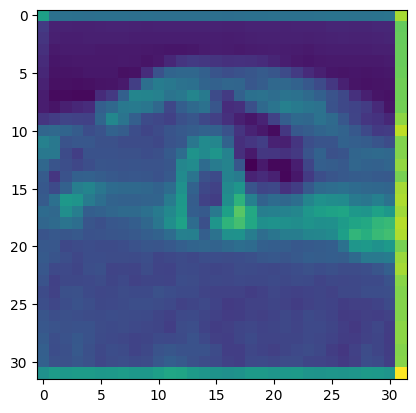

In [17]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

# Deep CNN

In [18]:
class FirstCNN_v2(nn.Module):
  def __init__(self):
    super(FirstCNN_v2, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 8, 3), # (N, 3, 32, 32) -> (N, 8, 30, 30)
        nn.Conv2d(8, 16, 3) # (N, 8, 30, 30) -> (N, 16, 28, 28)
    )

  def forward(self, x):
      x = self.model(x)
      return x

In [19]:
net_v2 = FirstCNN_v2()
out = net_v2(images)
out.shape

torch.Size([4, 16, 28, 28])

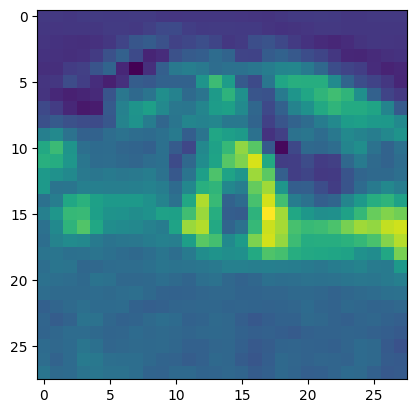

In [20]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

In [21]:
class FirstCNN_v3(nn.Module):
  def __init__ (self):
    super(FirstCNN_v3, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 6, 5), # (N, 3, 32, 32) -> (N, 6, 28, 28)
        nn.AvgPool2d(2, stride=2), # (N, 6, 28, 28) -> (N, 6, 14, 14)
        nn.Conv2d(6, 16, 5), # (N, 6, 14, 14) -> (N, 16, 10, 10)
        nn.AvgPool2d(2, stride=2) # (N, 16, 10, 10) -> (N, 16, 5, 5)

    )

  def forward(self, x):
    x = self.model(x)
    return x

In [22]:
net_v3 = FirstCNN_v3()
out = net_v3(images)
out.shape

torch.Size([4, 16, 5, 5])

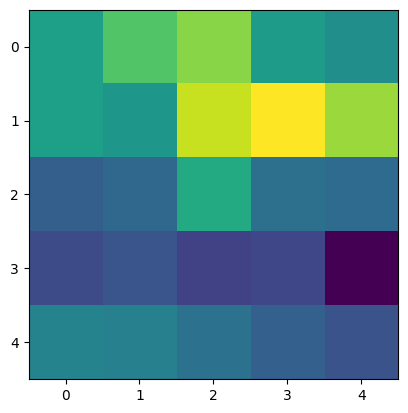

In [23]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

# LeNet

In [24]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3, 6, 5), # (N, 3, 32, 32) -> (N, 6, 28, 28)
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2), # (N, 6, 28, 28) -> (N, 6, 14, 14)
        nn.Conv2d(6, 16, 5), # (N, 6, 14, 14) -> (N, 16, 10, 10)
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2) # (N, 16, 10, 10) -> (N, 16, 5, 5)

    )
    self.fc_model = nn.Sequential(
        nn.Linear(400, 120), # (N, 400) -> (N, 120)
        nn.Tanh(),
        nn.Linear(120, 84), # (N, 120) -> (N, 84)
        nn.Tanh(),
        nn.Linear(84, 10) # (N, 84) -> (N, 10)


    )
  def forward(self, x):
      print(x.shape)
      features = self.cnn_model(x)
      print(features.shape)
      features = features.view(x.shape[0], -1)
      print(features.shape)
      x = self.fc_model(features)
      print(x.shape)
      return x

In [25]:
net_le = LeNet()
out = net_le(images)
out.shape

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


torch.Size([4, 10])

In [26]:
print(out)

tensor([[-0.1405, -0.0132,  0.0718,  0.0093,  0.1132, -0.1022,  0.0283, -0.0399,
          0.0581, -0.0089],
        [-0.1576, -0.0251,  0.0720,  0.0086,  0.1109, -0.1030,  0.0237, -0.0401,
          0.0567, -0.0231],
        [-0.1561, -0.0051,  0.0713,  0.0172,  0.1088, -0.0947,  0.0174, -0.0535,
          0.0406, -0.0147],
        [-0.1419, -0.0225,  0.0710,  0.0070,  0.1141, -0.0991,  0.0309, -0.0538,
          0.0532, -0.0119]], grad_fn=<AddmmBackward0>)


In [27]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([4, 4, 4, 4])


# Training Lenet

In [28]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3, 6, 5), # (N, 3, 32, 32) -> (N, 6, 28, 28)
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2), # (N, 6, 28, 28) -> (N, 6, 14, 14)
        nn.Conv2d(6, 16, 5), # (N, 6, 14, 14) -> (N, 16, 10, 10)
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2) # (N, 16, 10, 10) -> (N, 16, 5, 5)

    )
    self.fc_model = nn.Sequential(
        nn.Linear(400, 120), # (N, 400) -> (N, 120)
        nn.Tanh(),
        nn.Linear(120, 84), # (N, 120) -> (N, 84)
        nn.Tanh(),
        nn.Linear(84, 10) # (N, 84) -> (N, 10)


    )
  def forward(self, x):
      print(x.shape)
      features = self.cnn_model(x)
      features = features.view(x.shape[0], -1)
      x = self.fc_model(features)

      return x



In [29]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [30]:
def evaluate(dataloader):
  total, correct = 0, 0
  for data in dataloader:
    inputs, labels = data
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()

  return 100 * correct / total

In [31]:
net = LeNet()

In [32]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

In [ ]:
%%time

loss_arr = []
loss_epoch_arr = []
max_epochs = 16
n_batches_avg = 100  # Number of batches to average the loss over

for epoch in range(max_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % n_batches_avg == n_batches_avg - 1:
            avg_loss = running_loss / n_batches_avg
            loss_arr.append(avg_loss)
            running_loss = 0.0

    # Calculate validation loss
    val_loss = 0.0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = net(inputs)
            val_loss += loss_function(outputs, labels).item()
    val_loss /= len(testloader)
    loss_epoch_arr.append(val_loss)

    print('Epoch: %d/%d, Test loss: %0.2f, Train loss: %0.2f' % (
        epoch, max_epochs, val_loss, loss_arr[-1]))

plt.plot(loss_epoch_arr, label='Validation Loss')
plt.plot(loss_arr, label='Train Loss')
plt.legend()
plt.show()


# Move to GPU

In [35]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [36]:
def evaluate(dataloader):
  total, correct = 0, 0
  with torch.no_grad():
    for data in dataloader:
      inputs, labels = data
      inputs, labels = inputs.to(device), labels.to(device)
      outputs = net(inputs)
      _, pred = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (pred == labels).sum().item()

  return 100 * correct / total

In [37]:
net = LeNet().to(device)

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())


In [41]:
# %%time

# loss_arr = []
# loss_epoch_arr = []
# max_epochs = 16
# n_batches_avg = 100  # Number of batches to average the loss over

# for epoch in range(max_epochs):
#     running_loss = 0.0
#     for i, data in enumerate(trainloader, 0):
#         inputs, labels = data
#         optimizer.zero_grad()
#         outputs = net(inputs)
#         loss = loss_function(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item()
#         if i % n_batches_avg == n_batches_avg - 1:
#             avg_loss = running_loss / n_batches_avg
#             loss_arr.append(avg_loss)
#             running_loss = 0.0

#     # Calculate validation loss
#     val_loss = 0.0
#     with torch.no_grad():
#         for data in testloader:
#             inputs, labels = data
#             outputs = net(inputs)
#             val_loss += loss_function(outputs, labels).item()
#     val_loss /= len(testloader)
#     loss_epoch_arr.append(val_loss)

#     print('Epoch: %d/%d, Test loss: %0.2f, Train loss: %0.2f' % (
#         epoch, max_epochs, val_loss, loss_arr[-1]))

# plt.plot(loss_epoch_arr, label='Validation Loss')
# plt.plot(loss_arr, label='Train Loss')
# plt.legend()
# plt.show()


In [40]:
# print("Test Accuracy: %0.2f, Train Accuracy: %0.2f" % evaluate(testloader), evaluate(trainloader))

# Basic Visualization

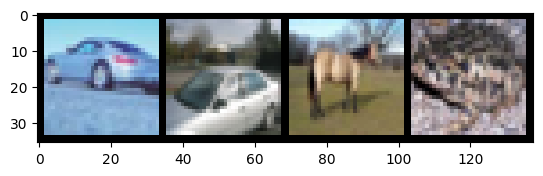

In [42]:
imshow(torchvision.utils.make_grid(images))

In [44]:
net = net.to('cpu')


In [48]:
out = net(images)

torch.Size([4, 3, 32, 32])


In [49]:
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

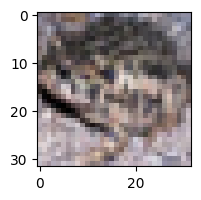

In [50]:
image_id = 3
plt.figure(figsize=(2,2))
imshow(images[image_id,])


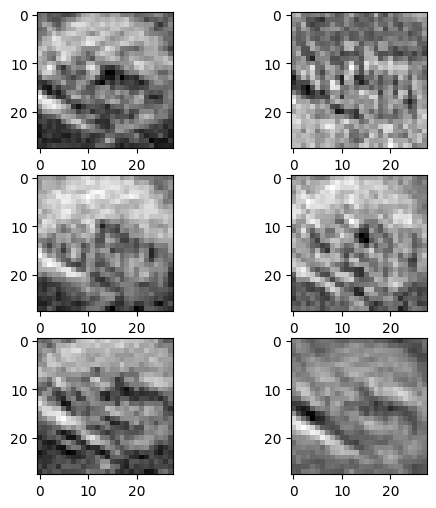

In [53]:
plt.figure(figsize=(6,6))
plt.subplot(321)
for i in range(6):
  ax1 = plt.subplot(3, 2, i+1)
  ax1.imshow(out[image_id, i, :, :].detach().numpy(), cmap='binary')

plt.show()

# Exercises

- Modify LeNet to work with ReLU instead of Tanh-> What is the impact on training time , final loss
- We have observed overfitting -> Use weight decay in torch.optim to add L2 regularization.
- Instead of CIFAR10, use MNIST. Download and visualize the dataset
- But importantly, MNIST images have only 1 channel instead of 3 channels in the case of CIFAR10. Modify LeNet to work with 1 channel images ,train and find optimized test accuracy.